<ipython-input-7-68096dda5c06>:73: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ep = Ellipse((self.x, self.y), self.ancho, self.alto, self.angulo, color = self.color, alpha = 1)
<ipython-input-7-68096dda5c06>:80: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ep = Ellipse((self.x, self.y), alto, ancho, angulo, color = self.color, alpha = 0.4)
<ipython-input-7-68096dda5c06>:100: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ep = Ellipse((self.x, self.y), 0.3, 0.3, 0, color = self.color, alpha = self.nectar)
<ipython-input-7-68096dda5c06>:102: MatplotlibDeprecationWarni

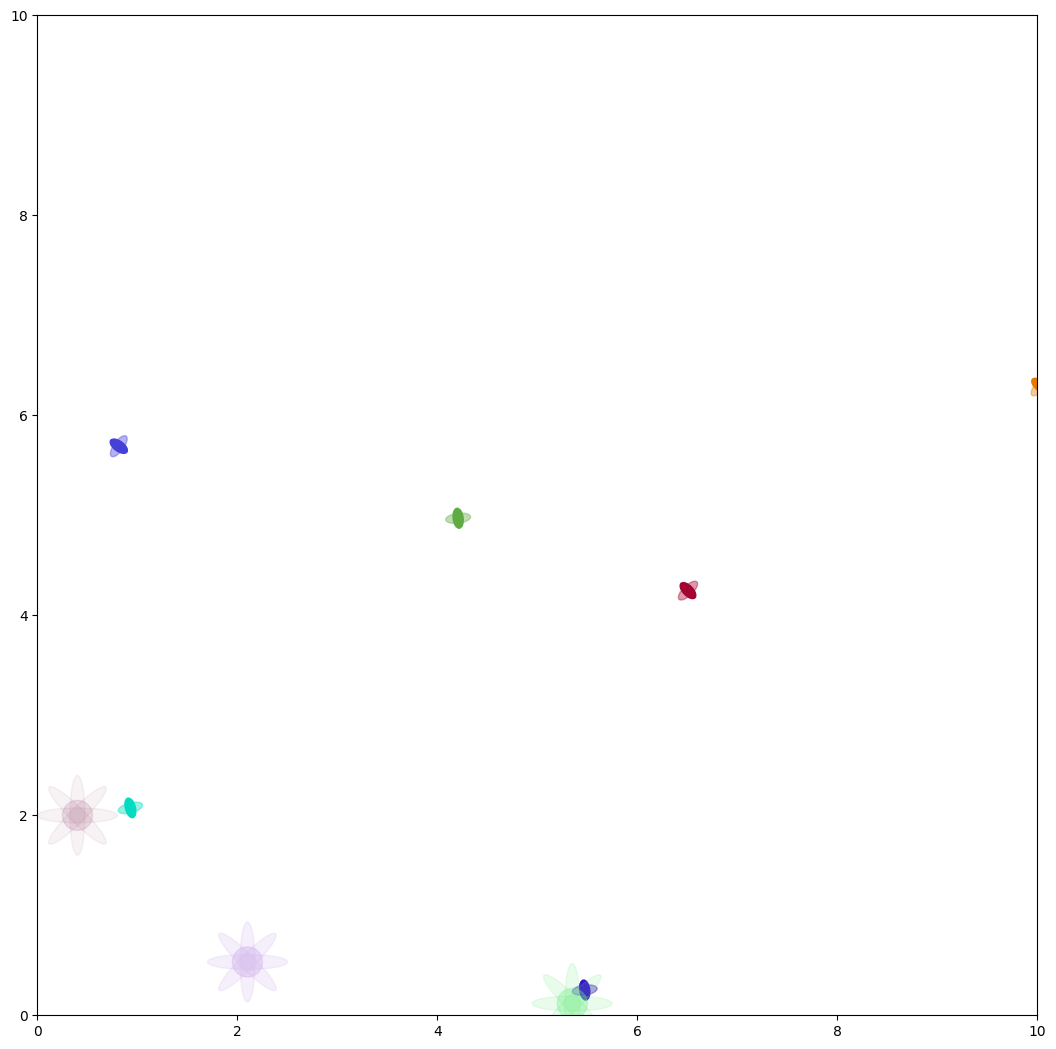

In [7]:
"""
==================
Proyecto Animación: Abejas y Flores
Principios de programación y análisis de datos.
==================
Animación de una simulación de percoreo
Autora: A. Sanchez
Fecha: Noviembre 2023.
"""

# Declaración de librerias

from pyparsing import alphas
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Ellipse


# parametros relacionados con la animación
plt.rcParams['animation.embed_limit'] = 2**128

# Se genera el "lienzo" o espacio para el escenario.
L = 10
fig = plt.figure(figsize=(L, L))
ax  = fig.add_axes([0, 0, 1, 1], frameon=True)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

"""
Definición de la clase abeja.
"""
class Abeja:

    def __init__(self, L):
        # Variables propias (self) del auto.
        self.vel        =  0.1     # Velocidad de desplazamiento de las bacterias.
        self.x          =  random.uniform(0,L)       # Coordenada X, valor inicializado random entre 0 y L
        self.y          =  random.uniform(0,L)     # Coordenada X, valor inicializado random entre 0 y L
        self.nectar     =  0   # Cantidad de gasolina en el auto
        self.angulo     =  random.uniform(0,360)
        self.ancho      = 0.2
        self.alto       = 0.1
        self.color      = (random.uniform(0,1), random.uniform(0,1), random.uniform(0,1))
        self.radio      = 1

    def actualiza_posicion(self, l_flores, percoreo):
      p1 = [self.x, self.y]

      for f in l_flores:
        p2 = [f.x, f.y]
        d = math.dist(p1,p2)
        nivel_percoreo = f.percoreo

        if d < (self.radio + 0.5) and nivel_percoreo < 3:
          self.x = self.x + (self.vel* (f.x - self.x))
          self.y = self.y + (self.vel* (f.y - self.y))
        else:
          self.angulo = self.angulo + random.uniform(-10,10)
          self.x = self.x + (self.vel*math.cos(self.angulo))
          if self.x > 9 or self.x < 0:
            self.x = self.x * -1
          self.y = self.y + (self.vel*math.sin(self.angulo))
          if self.y > 9 or self.y < 0:
            self.y = self.y * -1

    def dibuja_abeja(self):
      ep = Ellipse((self.x, self.y), self.ancho, self.alto, self.angulo, color = self.color, alpha = 1)
      ax.add_patch(ep)

      ancho  = 0.5 * self.ancho
      alto   = 2.5 * self.alto
      angulo = self.angulo + 90

      ep = Ellipse((self.x, self.y), alto, ancho, angulo, color = self.color, alpha = 0.4)
      ax.add_patch(ep)





class Flor:

    def __init__(self, L, n_max_nectar):
        self.x              = random.uniform(0,L-1)
        self.y              = random.uniform(0,L-1)
        self.nectar         = random.uniform(0,n_max_nectar) / n_max_nectar
        self.color          = (random.uniform(0,1), random.uniform(0,1), random.uniform(0,1))
        self.percoreo       = 0
        self.radio_percoreo = 1


    def dibuja_flor(self):

        ep = Ellipse((self.x, self.y), 0.3, 0.3, 0, color = self.color, alpha = self.nectar)
        ax.add_patch(ep)
        ep = Ellipse((self.x, self.y), 0.15, 0.8, 0, color = self.color, alpha = 0.5*self.nectar)
        ax.add_patch(ep)
        ep = Ellipse((self.x, self.y), 0.15, 0.8, 45, color = self.color, alpha = 0.5*self.nectar)
        ax.add_patch(ep)
        ep = Ellipse((self.x, self.y), 0.15, 0.8, 90, color = self.color, alpha = 0.5*self.nectar)
        ax.add_patch(ep)
        ep = Ellipse((self.x, self.y), 0.15, 0.8, 135, color = self.color, alpha = 0.5*self.nectar)
        ax.add_patch(ep)


    def actualiza_nivel_nectar(self):

      return self.nectar

    def actualiza_percoreo(self,l_abejas):
      p1 = [self.x, self.y]

      self.percoreo = 0

      for a in l_abejas:

          p2 = [a.x, a.y]
          d = math.dist(p1,p2)

          if d < self.radio_percoreo:
            self.percoreo = self.percoreo + 1
      return self.percoreo


"""
Parámetros GLOBALES del sistema
"""
n_abejas     = 7
n_flores     = 3
nivel_max_nectar = 10
"""
+ Se genera una lista que contiene los elementos o partículas que se desplazarán en el espacio recien construido.
"""
lista_flores = []
for _ in range(n_flores):
  una_flor = Flor(L,nivel_max_nectar)
  lista_flores.append(una_flor)


lista_abejas = []
for _ in range(n_abejas):
    una_abeja = Abeja(L)
    lista_abejas.append(una_abeja)


"""
Función de actualización, el parámetro "frame_number" se calcula a partir de los parámetros en FuncAnimation.
"""
def update(frame_number):
    ax.cla() #clears everything
    ax.set(xlim=(0,L),ylim=(0,L))

    # Ciclo para dibujar las abejas
    for a in lista_abejas:
      a.dibuja_abeja()

    for f in lista_flores:
      f.dibuja_flor()

    # Actualiza posiciones de TODOS los autos
    for a in lista_abejas:
        a.actualiza_posicion(lista_flores, f.percoreo)


    for f in lista_flores:
        f.actualiza_percoreo(lista_abejas)




"""
En la linea 118 se realiza la ejecución de la animación. El frame rate y número de pasos se definen por medio de los siguientes parámetros:
n_frames -> numero de frames.
t_interval -> tiempo entre cuadros consecutivos (en milisegundos).
https://matplotlib.org/stable/api/animation_api.html
"""
n_frames = 100;
t_interval = 100;
animation = FuncAnimation(fig, update,frames=n_frames,interval=t_interval)

# Como estamos coriendo el código en una máquina virtual de colab,
# esta linea se incluye para poder vaciar el output desde la salida estandar (monitor) hacia un formato de video compatible con el motor del navegador (HTML)

HTML(animation.to_html5_video())